In [1]:
# import dependencies
import pandas as pd

In [2]:
# Read in April 2022 New York citibike data
apr2022_df = pd.read_csv('data/raw/202204-citibike-tripdata.csv')
apr2022_df.head()

/Users/ellengrove/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,2E89F1D88B8347E6,classic_bike,2022-04-08 19:50:00,2022-04-08 19:55:28,E 89 St & 3 Ave,7265.10,Madison Ave & E 99 St,7443.01,40.780628,-73.952167,40.789485,-73.952429,member
1,43F6D61DFEDAE4AF,electric_bike,2022-04-27 10:19:54,2022-04-27 10:33:29,Broadway & W 29 St,6289.06,Broadway & W 29 St,6289.06,40.746201,-73.988557,40.746201,-73.988557,member
2,21C7076071104314,classic_bike,2022-04-28 13:10:59,2022-04-28 13:17:18,E 123 St & Lexington Ave,7636.05,E 123 St & Lexington Ave,7636.05,40.802926,-73.937900,40.802926,-73.937900,member
3,7D7CEA2953427D0C,classic_bike,2022-04-13 20:21:18,2022-04-13 20:37:28,W 36 St & 9 Ave,6569.07,W 36 St & 9 Ave,6569.07,40.754623,-73.995168,40.754623,-73.995168,member
4,AD7E176748A4A55E,electric_bike,2022-04-29 18:56:24,2022-04-29 18:57:16,Graham Ave & Withers St,5403.04,Graham Ave & Withers St,5403.04,40.716981,-73.944859,40.716981,-73.944859,member


In [3]:
# drop unnecessary columns
apr2022_df.drop(columns=['ride_id','start_station_id','end_station_id'],inplace=True)

# drop null values
apr2022_df.dropna(inplace=True)

# replace instances of '\t' in station names with spaces
apr2022_df.replace('\t',' ', regex=True,inplace=True)

In [4]:
# round latitude and longitude to 3 decimal places
apr2022_df['start_lat'] = apr2022_df['start_lat'].round(3)
apr2022_df['end_lat'] = apr2022_df['end_lat'].round(3)
apr2022_df['start_lng'] = apr2022_df['start_lng'].round(3)
apr2022_df['end_lng'] = apr2022_df['end_lng'].round(3)

In [5]:
# split started_at variable into date and time
apr2022_df[['start_date','start_time']] = apr2022_df['started_at'].str.split(" ", expand=True)

# select only one week of data
apr2022_subset_df = pd.DataFrame(apr2022_df.loc[(apr2022_df['start_date'] >= '2022-04-03') \
                             & (apr2022_df['start_date'] <='2022-04-09'),:])

# drop the date and time variables that we created just to isolate the date range we wanted
apr2022_subset_df.drop(columns=['start_date','start_time'],inplace=True)

In [6]:
# create datetime variables for started time
apr2022_subset_df['start_datetime'] = pd.to_datetime(apr2022_subset_df['started_at'])
apr2022_subset_df['end_datetime'] = pd.to_datetime(apr2022_subset_df['ended_at'])
apr2022_subset_df['time_delta'] = (apr2022_subset_df['end_datetime'] - apr2022_subset_df['start_datetime']).astype('timedelta64[m]')

In [7]:
# drop rides with trip duration less than or equal to 0 or greater than 2 hours
apr2022_subset_df = apr2022_subset_df.loc[(apr2022_subset_df['time_delta'] > 0) & \
                                          (apr2022_subset_df['time_delta'] <= 120)]

count    416453.000000
mean         12.490792
std          11.754652
min           1.000000
25%           5.000000
50%           9.000000
75%          16.000000
max         120.000000
Name: time_delta, dtype: float64

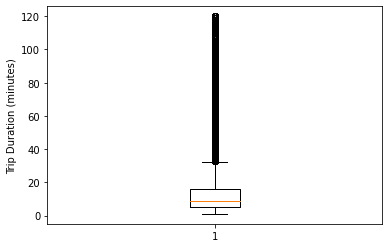

In [8]:
import matplotlib.pyplot as plt

# boxplot and descriptive stats showing distribution of ride durations
plt.boxplot(apr2022_subset_df['time_delta']);
plt.ylabel('Trip Duration (minutes)');
apr2022_subset_df['time_delta'].describe()

In [9]:
# drop redundant datetime variables
apr2022_subset_df.drop(columns=['start_datetime','end_datetime','time_delta'],inplace=True)

In [10]:
# reset index
apr2022_subset_df.reset_index(drop=True,inplace=True)
apr2022_subset_df

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
0,classic_bike,2022-04-08 19:50:00,2022-04-08 19:55:28,E 89 St & 3 Ave,Madison Ave & E 99 St,40.781,-73.952,40.789,-73.952,member
1,electric_bike,2022-04-06 15:44:58,2022-04-06 15:50:36,1 Ave & E 110 St,E 91 St & 2 Ave,40.792,-73.938,40.781,-73.950,member
2,classic_bike,2022-04-06 17:50:07,2022-04-06 18:06:11,E 48 St & 5 Ave,W 13 St & 5 Ave,40.757,-73.978,40.735,-73.994,member
3,classic_bike,2022-04-05 17:50:47,2022-04-05 18:09:16,Henry St & Atlantic Ave,Lafayette Ave & Classon Ave,40.691,-73.996,40.689,-73.960,member
4,classic_bike,2022-04-05 18:46:16,2022-04-05 19:09:31,W 36 St & 9 Ave,West End Ave & W 94 St,40.755,-73.995,40.794,-73.974,member
...,...,...,...,...,...,...,...,...,...,...
416448,classic_bike,2022-04-04 15:16:55,2022-04-04 16:04:28,3 St & Prospect Park West,Prospect Pl & Underhill Ave,40.668,-73.974,40.677,-73.966,member
416449,electric_bike,2022-04-09 17:06:27,2022-04-09 17:08:12,Grand St & Greene St,West Broadway & Watts St,40.722,-74.002,40.723,-74.003,member
416450,electric_bike,2022-04-07 08:46:03,2022-04-07 08:54:51,E 11 St & 1 Ave,1 Ave & E 39 St,40.730,-73.984,40.747,-73.971,member
416451,electric_bike,2022-04-09 20:14:20,2022-04-09 20:16:25,W 106 St & Amsterdam Ave,Columbus Ave & W 103 St,40.801,-73.966,40.797,-73.964,member


In [11]:
# export to csv
apr2022_subset_df.to_csv('data/apr2022_citibike.csv')

In [12]:
# count number of rides departing from each station
start_stations = apr2022_subset_df[['start_station_name','start_lat','start_lng']]
start_count = pd.DataFrame(start_stations.value_counts())
start_count.reset_index(inplace=True)
start_count.rename(columns={0 : 'start_count',
                            'start_station_name' : 'station_name',
                            'start_lat' : 'lat',
                            'start_lng' : 'lng'}, inplace=True)

In [13]:
# count number of rides arriving at each station
end_stations = apr2022_subset_df[['end_station_name','end_lat','end_lng']]
end_count = pd.DataFrame(end_stations.value_counts())
end_count.reset_index(inplace=True)
end_count.rename(columns={0 : 'end_count',
                            'end_station_name' : 'station_name',
                            'end_lat' : 'lat',
                            'end_lng' : 'lng'}, inplace=True)

In [14]:
# merge datasets togther
station_counts = pd.merge(start_count,end_count,on=['station_name','lat','lng'],how='outer')

In [15]:
# replace any null values with zeroes
station_counts.fillna(0,inplace=True)

In [18]:
# export to csv
station_counts.to_csv('data/station_counts.csv')